In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
# import scipy.stats as st
# import numpy as np

### Import DataFrame

In [ ]:
# Generate Each CSV file into saperate DataFrames
state_name = pd.read_csv("STATEWISE DATA LABOR FORCE/state_name.csv")
state_name = state_name[['States', 'st']]

In [24]:
# import data from files
labor_force_df = pd.read_csv("clean_state_labor_force_1979-2020.csv")
wage_df = pd.read_csv("clean_combine_state_prof_wage_1997-2019.csv", low_memory=False)
min_wage_df = pd.read_csv("mini_wage_data.csv")
# min_wage_df = min_wage_df.reset_index(drop=True)

In [44]:
# change all columns to lower case
labor_force_df.columns = map(str.lower, labor_force_df.columns)
wage_df.columns = map(str.lower, wage_df.columns)
min_wage_df.columns = map(str.lower, min_wage_df.columns)

In [45]:
# rename coulumn state to states
wage_df = wage_df.rename(columns={'state':'states'})
min_wage_df = min_wage_df.rename(columns={'state':'states'})

In [46]:
# States of interest
state_in = ['California','New York','Alabama','Texas','Arizona','Illinois']

In [47]:
# change Data Frame only to contain only states of interest
labor_force_df = labor_force_df[labor_force_df.states.isin(state_in)]
wage_df = wage_df[wage_df.states.isin(state_in)]
min_wage_df = min_wage_df[min_wage_df.states.isin(state_in)]

In [52]:
# year range
years= range(1997, 2020)
labor_force_df = labor_force_df[labor_force_df.year.isin(years)]
wage_df = wage_df[wage_df.year.isin(years)]
min_wage_df = min_wage_df[min_wage_df.year.isin(years)]

In [53]:
labor_force_df.head()

,year,period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,states,st
21,1997,Sep,64.6,61.4,2142854,2036969,105885,4.9,Alabama,al
22,1998,Sep,63.8,60.9,2137201,2040513,96688,4.5,Alabama,al
23,1999,Sep,63.6,60.6,2141338,2038338,103000,4.8,Alabama,al
24,2000,Sep,62.9,60.0,2127432,2030794,96638,4.5,Alabama,al
25,2001,Sep,62.2,58.8,2110339,1996677,113662,5.4,Alabama,al


In [54]:
wage_df.head()

,area,states,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
0,1.0,Alabama,13002.0,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997.0
1,1.0,Alabama,13005.0,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997.0
2,1.0,Alabama,13008.0,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997.0
3,1.0,Alabama,13011.0,"Marketing, Advertising, and Public Relations M...",4500,23.76,49420,21.52,44762,NaN,1997.0
4,1.0,Alabama,13014.0,Administrative Services Managers,2950,20.98,43650,19.32,40186,NaN,1997.0


In [55]:
min_wage_df.head()

,unnamed: 0,year,states,table_data,footnote,high.value,low.value,cpi.average,high.2018,low.2018
1595,1595,1997,Alabama,...,NaN,0.00,0.00,160.516667,0.00,0.00
1597,1597,1997,Arizona,...,NaN,0.00,0.00,160.516667,0.00,0.00
1599,1599,1997,California,4.75,NaN,4.75,4.75,160.516667,7.41,7.41
1610,1610,1997,Illinois,4.75[c],[c],4.75,4.75,160.516667,7.41,7.41
1629,1629,1997,New York,4.25,NaN,4.25,4.25,160.516667,6.63,6.63


# Plot

In [ ]:
# # plot function that taking in a DataFrame, x_axis, y_axist and scatter plot
# def plot_df_scatter2(df, x_axis, y_axis, y1_axis, y2_axis, State):
#     fig = plt.figure(figsize=(8,15))
#     ax1 = fig.add_subplot(411)
#     ax2 = fig.add_subplot(412)
#     ax3 = fig.add_subplot(413)
#     ax4 = fig.add_subplot(414)
    
#     title = f'{x_axis} vs {y_axis} and {y1_axis} for {State}'
    
#     ax1.scatter(df[x_axis], df[y_axis], alpha=0.5, edgecolors='g')
#     ax1.set(ylabel = y_axis,
#            title = title)
#     ax2.scatter( df[x_axis], df[y1_axis], alpha=0.5, edgecolors='b')
#     ax2.set(ylabel = y1_axis)
    
#     ax3.scatter(df[x_axis], df[y1_axis]/df[y_axis],color='y')  
#     ax3.set(ylabel = f'{y1_axis}/{y_axis}')
    
#     ax4.scatter(df[x_axis],df[y2_axis], color='r')
#     ax4.set(ylabel=y2_axis)
    
#     plt.savefig(f'Kosal_Resources\MinimumWage_plot\{title}.png')

In [108]:
state = state_in[1]
lf_df = labor_force_df[labor_force_df.states == state]
lf_df['UNEM'] = lf_df['unemployment rate'].apply(pd.to_numeric)


<ipython-input-108-2b87a851bc2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf_df['UNEM'] = lf_df['unemployment rate'].apply(pd.to_numeric)


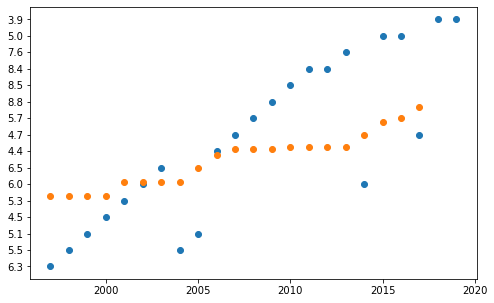

In [109]:
state = state_in[1]
lf_df = labor_force_df[labor_force_df.states == state]
mw_df = min_wage_df[min_wage_df.states==state]
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.scatter(lf_df.year, lf_df['unemployment rate']);
ax1.scatter(mw_df.year, mw_df['high.value']);

In [88]:
lf_df[lf_df.year==2010].head()

,year,period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,states,st
34,2010,Sep,59.6,53.7,2212523,1990948,221575,10.0,Alabama,al


In [110]:
lf_df[lf_df['labor force participation rate']=='59.6']

C:\Users\ksien\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,year,period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,states,st
